Light Gradient Boosting Machine Classification

In [1]:
# import library

import lightgbm as lgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
# load dataset
df = pd.read_csv('dataset_afterCleaning.csv')

In [ ]:
df.head()

,track_id,artists,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,time_signature,explicit_encoded,track_genre_encoded,intensity,liveliness,grooviness
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,1.728257,0.189645,0.597905,-0.879549,-1.210910,0.142555,-1.367606,1.647794,...,-0.293978,1.067265,0.806275,-1.171010,0.0,-0.335674,-0.621248,0.713317,-0.185137,-0.266391
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,0.919403,-1.065350,-1.023709,-2.187129,-1.210910,-2.938252,0.731205,0.158913,...,-0.293735,-0.708863,-1.022838,-1.521623,0.0,-0.335674,-0.621248,0.879661,-1.415138,-2.245726
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,1.009275,-0.117539,-0.909690,-1.331662,-1.492264,-0.735074,0.731205,-0.300921,...,-0.294031,-0.598287,-1.623016,-1.560524,0.0,-0.335674,-0.621248,0.456278,-0.048836,-1.541566
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,1.638384,-0.255230,-1.999212,-2.658745,-1.492264,-3.043697,0.731205,-0.733969,...,-0.290263,-0.494622,-1.529110,1.983533,0.0,-0.335674,-0.621248,2.090942,-0.240110,-3.174164
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,2.132684,-0.302918,0.230508,-0.959334,-0.929557,-0.719507,0.731205,-0.370119,...,-0.294031,-0.833952,-1.431122,-0.094021,0.0,-0.335674,-0.621248,-0.074492,-0.838419,-0.742958


In [3]:
# drop categorical columns
df = df.drop(columns=['track_id', 'artists', 'time_signature'])

In [4]:
# set target and feature cols
X = df.drop(columns=['popularity'])
y = df['popularity'] # target

In [5]:
# split data for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

In [7]:
# params
params = {
    'objective': 'regression',
    'metric': 'l2',               # L2 loss for regression (Mean Squared Error)
    'boosting_type': 'gbdt',      # deafult
    'num_leaves': 31,             # default
    'learning_rate': 0.05,        # Learning rate
    'max_depth': 5,               # Maximum depth of trees (to prevent overfitting)
    'verbosity': -1,
}

In [8]:
# model training
model = lgb.train(
    params,
    train_data,
    num_boost_round=200,              # Reduce the number of boosting rounds to save memory
    valid_sets=[test_data],            # Provide the validation data
    valid_names=['eval'],              # Name the validation set for clarity
)

In [9]:
# prediction
y_pred = model.predict(X_test, num_iteration=model.best_iteration)

In [10]:
print("Predictions:", y_pred[:10])

Predictions: [ 0.52895782  0.10786958  0.2255387  -0.30151077  0.22215076  0.09573334
 -0.01819158  0.25715831  0.00164684  0.31471809]


In [ ]:
# model evaluation using mse mae r2 score

In [11]:
# training
y_train_pred = model.predict(X_train)

# Calculate the performance on the training set
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Training MAE: {train_mae}")
print(f"Training MSE: {train_mse}")
print(f"Training RMSE: {train_rmse}")
print(f"Training R² Score: {train_r2}")

Training MAE: 0.6977337175119268
Training MSE: 0.7695379005358479
Training RMSE: 0.8772330936164275
Training R² Score: 0.23205149965513294


In [12]:
# mse rmse mae r2

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
rmse = mean_squared_error(y_test, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse}")
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 0.7894330673426484
Root Mean Squared Error (RMSE): 0.7894330673426484
Mean Absolute Error (MAE): 0.7050062180321444
R² Score: 0.20391742923413403


The higher RMSE on training data, low R² scores, and the slightly better performance on the test data suggest that the model is not capturing enough of the variance in the data. This might mean that the model is underfitting (not complex enough to learn the patterns in the data)

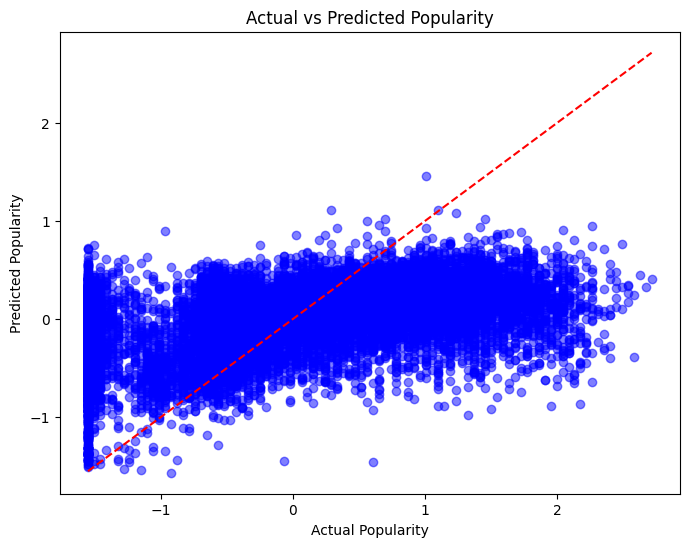

In [13]:
# actual vs predicted plot to check how well model is doing
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Actual vs Predicted Popularity')
plt.show()

Points close to the diagonal red line mean good predictions. The farther the points are from the line, the worse the predictions

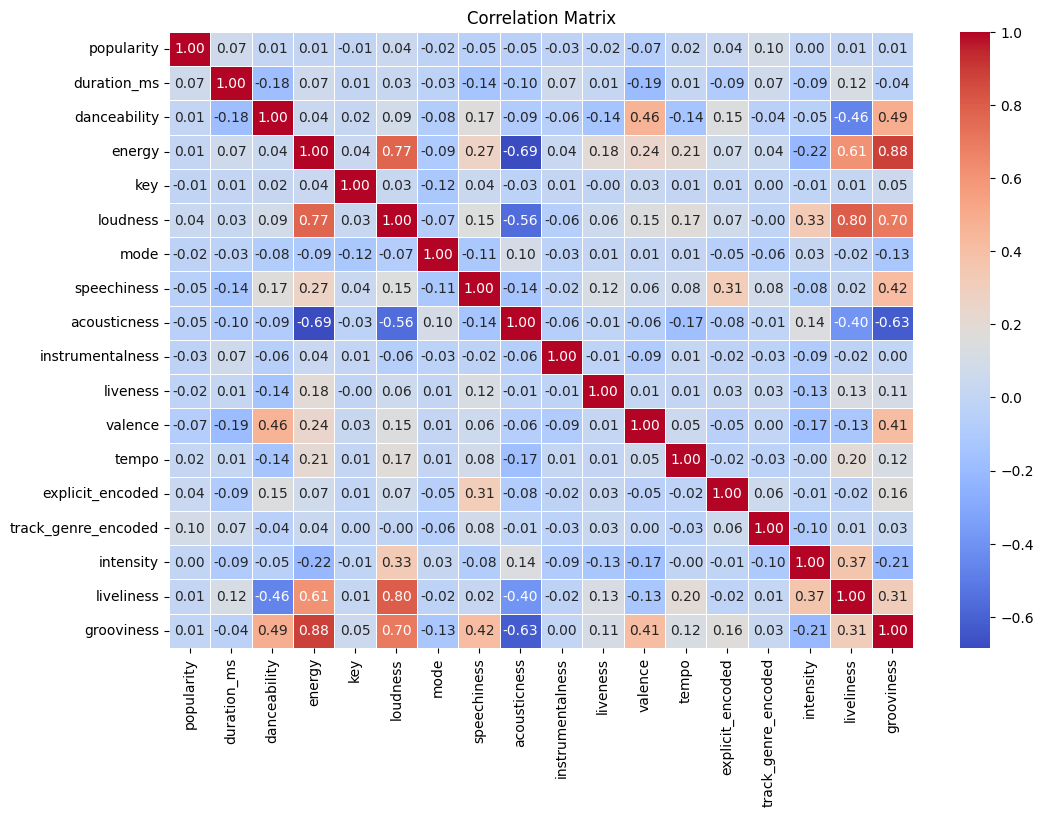

In [14]:
# correlation matrix
import seaborn as sns
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

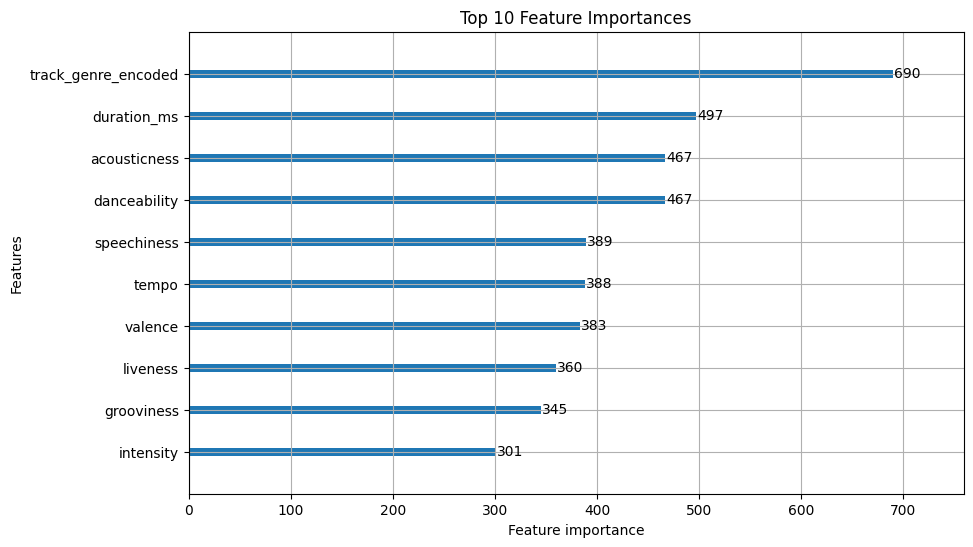

In [15]:
# check what features are really in use
lgb.plot_importance(model, max_num_features=10, importance_type='split', figsize=(10, 6))
plt.title('Top 10 Feature Importances')
plt.show()

In [16]:
# hyperparameter tuning using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [17]:
# model
model = lgb.LGBMRegressor()

In [18]:
# hyperparameters to perform
param_dist = {
    'num_leaves': [20, 31, 50, 70],
    'learning_rate': np.logspace(-5, -1, 5),  # Log scale for learning rate
    'n_estimators': [100, 150, 200, 250],
    'max_depth': [3, 5, 7],
    'min_data_in_leaf': [10, 20, 50, 100],
    'subsample': [0.6, 0.8, 1.0],          # Fraction of samples used for fitting
    'colsample_bytree': [0.6, 0.8, 1.0]
}

In [19]:
# Perform random search with cross-validation
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=30, cv=10,
                                   scoring='neg_mean_absolute_error', verbose=1, n_jobs=-1, random_state=42)
random_search.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],  # Validation dataset for early stopping
    eval_metric='l2'
)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags

RandomizedSearchCV(cv=10, estimator=LGBMRegressor(), n_iter=30, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01]),
                                        'max_depth': [3, 5, 7],
                                        'min_data_in_leaf': [10, 20, 50, 100],
                                        'n_estimators': [100, 150, 200, 250],
                                        'num_leaves': [20, 31, 50, 70],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=1)

In [20]:
# Best parameters from random search
print("Best Hyperparameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Hyperparameters: {'subsample': 0.8, 'num_leaves': 70, 'n_estimators': 250, 'min_data_in_leaf': 10, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.6}
Best Score: -0.6368183912930314


In [21]:
# Use the best model for prediction
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

In [22]:
# predicting training set
y_train_pred = best_model.predict(X_train)

In [23]:
# Calculate training metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

# Print training performance
print(f"Training Mean Absolute Error (MAE): {train_mae}")
print(f"Training Mean Squared Error (MSE): {train_mse}")
print(f"Training Root Mean Squared Error (RMSE): {train_rmse}")
print(f"Training R² Score: {train_r2}")

Training Mean Absolute Error (MAE): 0.5546262750554595
Training Mean Squared Error (MSE): 0.5158526439953758
Training Root Mean Squared Error (RMSE): 0.7182288242582414
Training R² Score: 0.48521279578389087


In [25]:
# calculate the MAE, MSE, RMSE, and R²
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 0.6303991289671341
Mean Squared Error (MSE): 0.6656706154750685
Root Mean Squared Error (RMSE): 0.8158863986334547
R² Score: 0.32872234927463906


The training MAE MSE and RMSE has improved indicating that the model is fitting the data more efficiently. The gap between the training R² and test R² has decreased suggesting the model is no longer overfitting as much either.

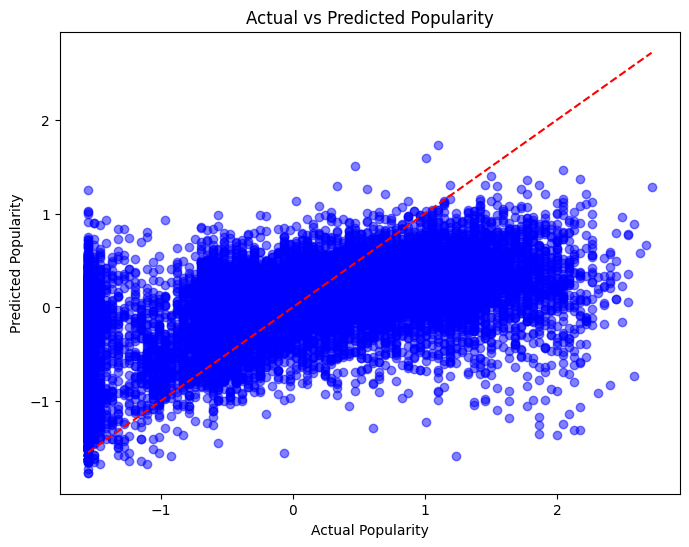

In [26]:
# new actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line of perfect prediction
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Actual vs Predicted Popularity")
plt.show()

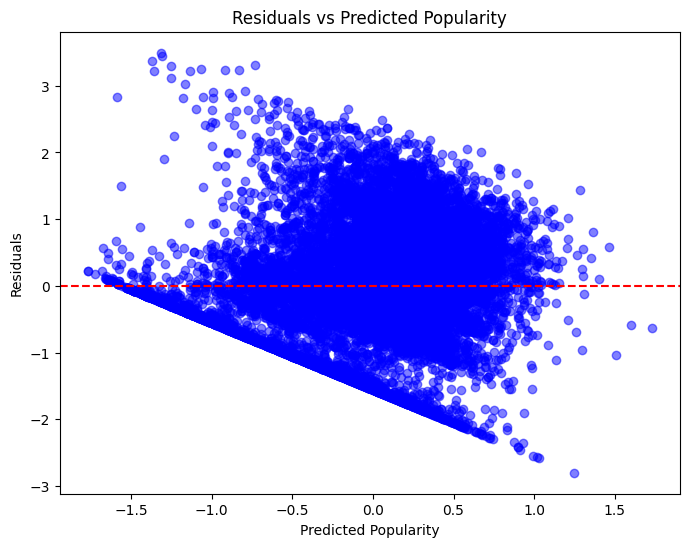

In [27]:
# residuals
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Line at 0 residual
plt.xlabel("Predicted Popularity")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Popularity")
plt.show()

In [28]:
import pickle

In [29]:
with open("lightgbm.pkl", "wb") as file:
    pickle.dump(best_model, file)